In [14]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import tensorflow as tf

In [15]:
# Read the databases from resources
health_factors = pd.read_csv("/content/Health_Risk_factors.csv")
freshwater = pd.read_csv("/content/freshwater.csv")
health_system=pd.read_csv("/content/health_system.csv")

In [21]:
health_factors.columns

Index(['Country', 'Prevalence of smoking Male % of adults 2016',
       'Prevalence of smoking female % of adults 2016',
       'Incidence of tuberculosis  per 100,000 people 2018',
       'Prevalence of diabetes  % of population ages 20 to 79 2019',
       'Incidence of HIV Total per 1,000 uninfected population ages 15-49 2018',
       'Prevalence of HIV Total % of population ages 15-49 2018',
       'Prevalence of HIV Women's share of population ages 15+ living with HIV % 2018',
       'Prevalence of HIV Youth, Male % of population ages 15-24 2018',
       'Prevalence of HIV Youth, Female % of population ages 15-24 2018',
       'Antiretroviral therapy coverage  % of people living with HIV 2018',
       'Cause of death Communicable diseases and maternal, prenatal, and nutrition conditions % of population 2016',
       'Cause of death Non-communicable diseases % of population 2016',
       'Cause of death Injuries % of population 2016'],
      dtype='object')

In [22]:
merged_df = pd.concat([freshwater, health_factors['Incidence of tuberculosis  per 100,000 people 2018']], axis=1)

In [24]:
merged_df.columns

Index(['Country', 'Annual freshwater withdrawals Flows billion cu. m 2014',
       'Annual freshwater withdrawals  billion cu. m 2014',
       'Annual freshwater withdrawals  % of internal resources 2014',
       'Annual freshwater withdrawals  % for agriculture 2015',
       'Annual freshwater withdrawals  % for industry 2014',
       'Water productivity  % of domestic 2015',
       'People using at least basic drinking water services GDP/water use 2010 $ per cu. m 2015',
       'People using at least basic drinking water services Urban % of urban population 2018',
       'People using at least basic drinking water services Rural % of Rural population 2018',
       'Incidence of tuberculosis  per 100,000 people 2018'],
      dtype='object')

<ipython-input-26-d03e59ae38ef>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


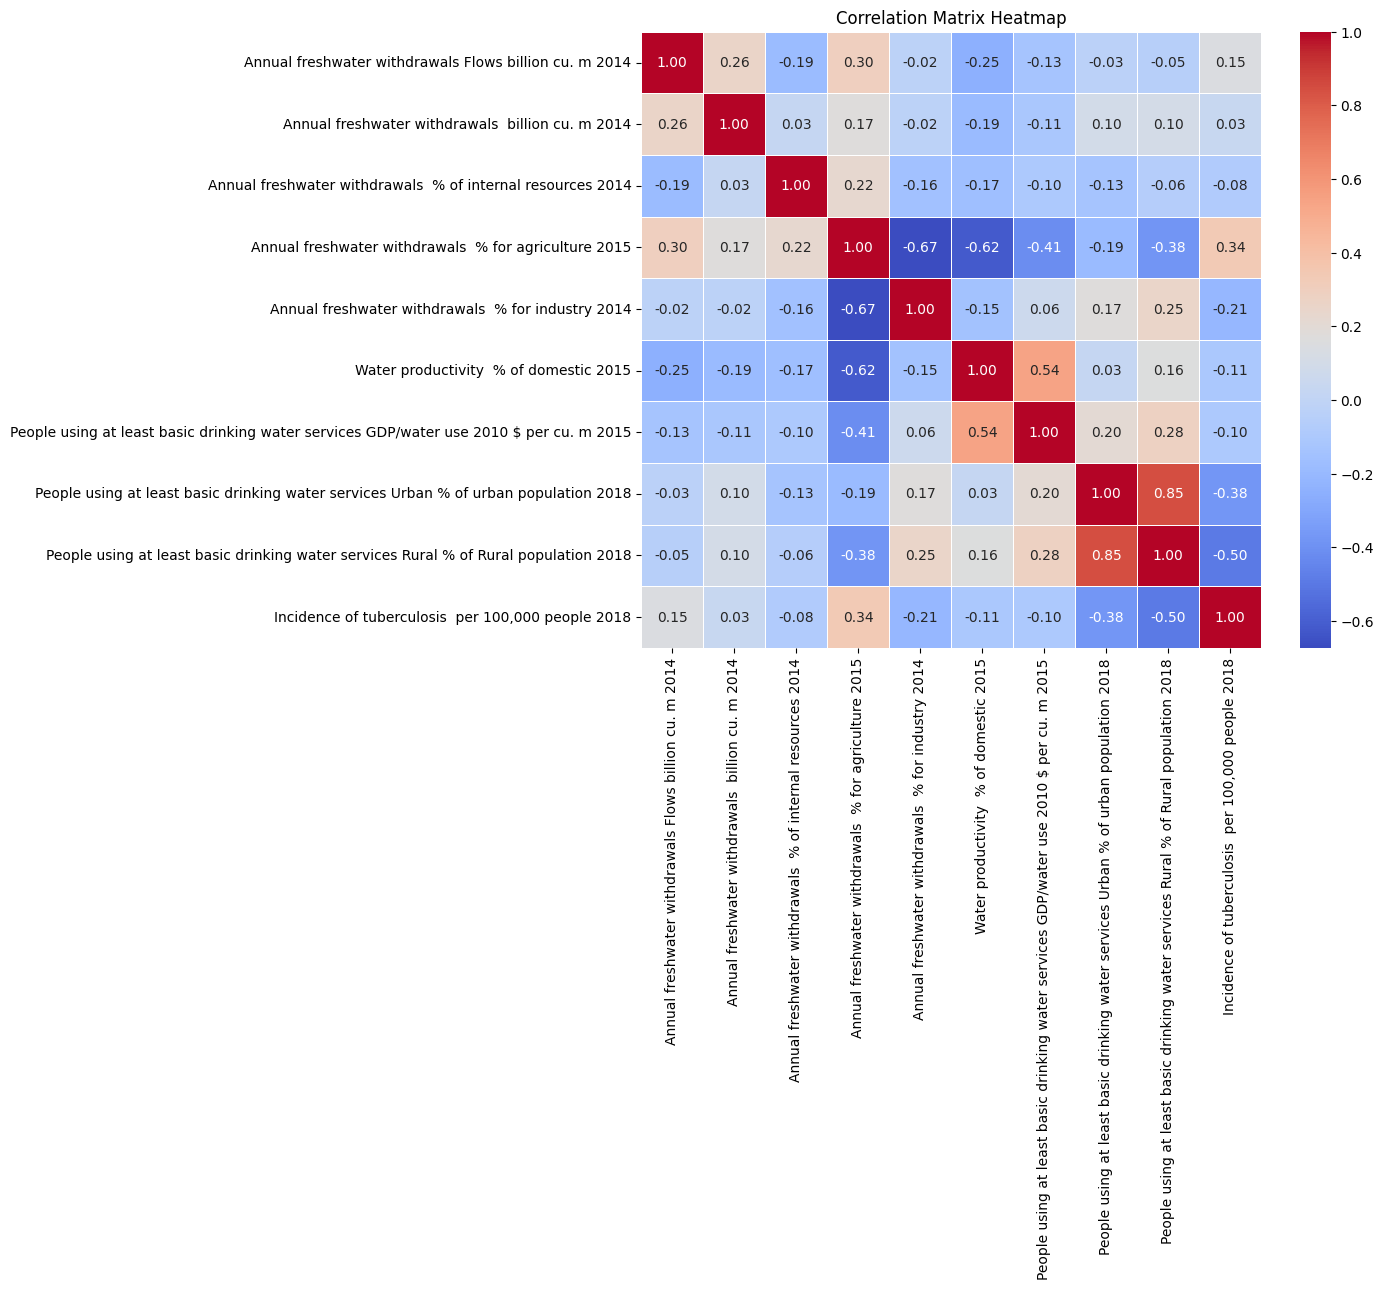

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'merged_df' with the columns of interest
correlation_matrix = merged_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [31]:
# Renaming columns in the health_factors DataFrame to more descriptive names
fw = merged_df.rename(columns={
    "Incidence of tuberculosis  per 100,000 people 2018": "tuberculosis",
    'Annual freshwater withdrawals  % for agriculture 2015': "water_agriculture",
    "People using at least basic drinking water services Urban % of urban population 2018": "water_urban",
    "People using at least basic drinking water services Rural % of Rural population 2018": "water_rural",})
fw.columns


Index(['Country', 'Annual freshwater withdrawals Flows billion cu. m 2014',
       'Annual freshwater withdrawals  billion cu. m 2014',
       'Annual freshwater withdrawals  % of internal resources 2014',
       'water_agriculture',
       'Annual freshwater withdrawals  % for industry 2014',
       'Water productivity  % of domestic 2015',
       'People using at least basic drinking water services GDP/water use 2010 $ per cu. m 2015',
       'water_urban', 'water_rural', 'tuberculosis'],
      dtype='object')

In [32]:
df1 = fw.replace('', np.nan)  # Replace empty values with NaN
df1 = fw.dropna()  # Drop rows with any missing values
#merge the DataFrames on Country
#hf = sustain_df.merge(hf, on="Country")
df1['Country'].replace('Korea, Dem. Peopleâ€™s Rep.', 'Korea, Dem', inplace=True)

<ipython-input-32-ef14ecb87c94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Country'].replace('Korea, Dem. Peopleâ€™s Rep.', 'Korea, Dem', inplace=True)


In [33]:
df1["tuberculosis"].describe()

count     72.000000
mean      87.402778
std      129.489426
min        0.000000
25%        7.750000
50%       31.000000
75%      108.000000
max      554.000000
Name: tuberculosis, dtype: float64

In [34]:
# Define the thresholds for classification

threshold_tuberculosis = 100
# Create a DataFrame to store the classified values
df2 = pd.DataFrame()
# Classify every columns
df2=df1[["water_agriculture","water_urban","water_rural" ]]
df2['tuberculosis'] = [0 if i < threshold_tuberculosis else 1 for i in df1['tuberculosis']]

# Extract X and y
y = df2['tuberculosis'].values
X = df2.drop(columns='tuberculosis').values


<ipython-input-34-ba402fa7caa6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tuberculosis'] = [0 if i < threshold_tuberculosis else 1 for i in df1['tuberculosis']]


In [35]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y,test_size=.2)

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
l_1 = 50
l_2 = 50
input_features = len(X_train[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=l_1, input_dim = input_features, activation = "tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=l_2, activation = "LeakyReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                200       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Train the model
nn.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 2s 13ms/step - loss: 0.6146 - accuracy: 0.7368
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5692 - accuracy: 0.7368
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.5300 - accuracy: 0.7368
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5015 - accuracy: 0.7368
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4812 - accuracy: 0.7368
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4584 - accuracy: 0.7544
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 0.4399 - accuracy: 0.7544
Epoch 8/50
2/2 [==============================] - 0s 9ms/step - loss: 0.4273 - accuracy: 0.7719
Epoch 9/50
2/2 [==============================] - 0s 9ms/step - loss: 0.4179 - accuracy: 0.8070
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4128 - accuracy: 0.7895
Epoch 11/50
2/2 [====================

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.3041 - accuracy: 0.8667 - 146ms/epoch - 146ms/step
Loss: 0.30411645770072937, Accuracy: 0.8666666746139526


In [40]:
# Predict on the test data
y_pred = nn.predict(X_test)

# The predictions will be in the form of probabilities, so you might want to round them to get class labels (0 or 1)
y_pred_class = y_pred.round()
# Calculate the accuracy of the predictions
correct_predictions = (y_pred_class == y_test.reshape(-1, 1)).sum()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

1/1 [==============================] - 0s 61ms/step
Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.50      0.67         4

    accuracy                           0.87        15
   macro avg       0.92      0.75      0.79        15
weighted avg       0.89      0.87      0.85        15

